# Predict geothermal heat flux: Ensemble Methods

References:
* https://scikit-learn.org/stable/modules/ensemble.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
* https://github.com/amirkdv/ghf-greenland-gbrt

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import math
import matplotlib.pylab as plt
import pandas as pd

Load the data.

In [2]:
data_train = pd.read_csv('data/R17_global_train.csv')
X_train = data_train.drop(['lon', 'lat', 'GHF'], axis=1)
y_train = data_train[['GHF']].values.ravel()

labels = X_train.columns.values
num_features = len(labels)

data_test = pd.read_csv('data/R17_global_test.csv')
X_test = data_test.drop(['lon', 'lat', 'GHF'], axis=1)
y_test = data_test[['GHF']].values.ravel()

print('Num Features:', num_features)
print(labels)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Num Features: 17
['thickness_upper_crust' 'thickness_middle_crust'
 'upper_mantle_density_anomaly' 'd_2_ridge' 'd_2_trench' 'd_2_trans_ridge'
 'd_2_volcano' 'd_2_hotspot' 'thickness_crust' 'd_2_young_rift'
 'upper_mantle_vel_structure' 'age' 'magnetic_anomaly' 'depth_to_moho'
 'lithos_asthenos_bdry' 'bougeur_gravity_anomaly' 'topography']
X_train shape: (3227, 17)
y_train shape: (3227,)
X_test shape: (807, 17)
y_test shape: (807,)


In [3]:
def print_stats(name, estimator):
    print('Test R^2:', estimator.score(X_test, y_test))
    pred = estimator.predict(X_test)
    rmse = (1 / np.average(y_test)) * math.sqrt(np.average((y_test - pred)**2))
    print ('Test RMSE:', rmse)
    print()

    sort_i = np.argsort(estimator.feature_importances_)
    fig, ax = plt.subplots(figsize=(7,7))
    plt.title('Feature Importance (%s)' % name)
    plt.xlabel('Importance')
    plt.barh(labels[sort_i], estimator.feature_importances_[sort_i])
    plt.show()

### Random Forest

Test R^2: 0.7239655736411224
Test RMSE: 0.1638166009245569



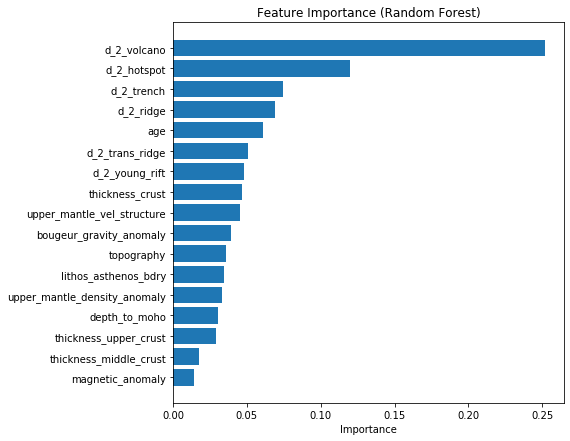

In [4]:
rf = RandomForestRegressor(n_estimators=100,
                           max_features='auto',
                           random_state=123456,
                           n_jobs=-1)
rf.fit(X_train, y_train)
print_stats('Random Forest', rf)

### Gradient Boosted Regression Trees (GBRT)

Test R^2: 0.722645381354009
Test RMSE: 0.16420787719400223



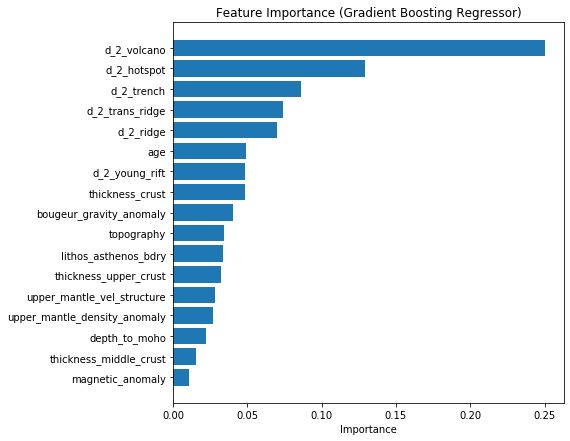

In [5]:
gbrt = GradientBoostingRegressor(n_estimators=2000,
                                 learning_rate=0.01,
                                 max_depth=9,
                                 loss='ls')
gbrt.fit(X_train, y_train)
print_stats('Gradient Boosting Regressor', gbrt)

### AdaBoost

Test R^2: 0.7025337951987519
Test RMSE: 0.17005723044636487



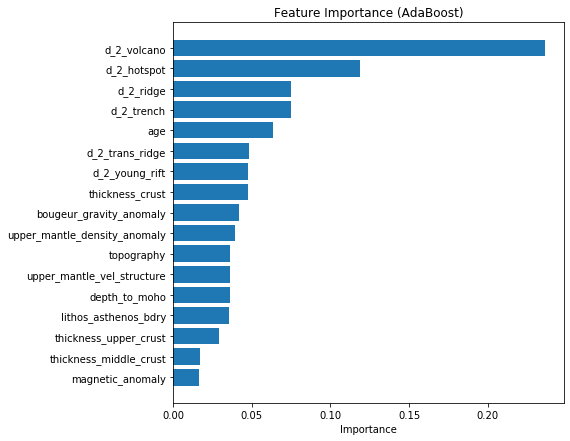

In [6]:
ada = AdaBoostRegressor(
    base_estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1),
    n_estimators=100,
    learning_rate=.01,
    loss='square'
)
ada.fit(X_train, y_train)
print_stats('AdaBoost', ada)